<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/copernicus_marine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='5'>Nesse notebook vou acessar a base de dados marítimos do Copernicus </font>

O manual pra visuzalização dos dados oceanicos do copernicus ta [aqui](https://marine.copernicus.eu/services/user-learning-services/visualizing-global-wave-product-america-continent) e é só baixar o notebook fornecidos por eles. O único porém, é que está em inglês.


<font size='5'>
Fazendo o download do dado usando o motuclient
</font>

In [25]:
!pip install motuclient==1.8.4

Esse é o código que preciso inserir na célula abaixo.

Note que eu preciso colocar o diretório que será baixado o arquivo e também meu usuario e senha no copernicus!
```
!python -m motuclient --motu http://nrt.cmems-du.eu/motu-web/Motu --service-id GLOBAL_ANALYSIS_FORECAST_WAV_001_027-TDS --product-id global-analysis-forecast-wav-001-027 --longitude-min -120 --longitude-max -10 --latitude-min -80 --latitude-max 35 --date-min "2020-08-14 00:00:00" --date-max "2020-08-20 00:00:00" --variable VHM0 --variable VMDR --out-dir /content --out-name global-analysis-forecast-wav-001-027_ex1.nc --user <USERNAME> --pwd "<PASSWORD>"
```



In [ ]:
!python -m motuclient --motu http://nrt.cmems-du.eu/motu-web/Motu --service-id GLOBAL_ANALYSIS_FORECAST_WAV_001_027-TDS --product-id global-analysis-forecast-wav-001-027 --longitude-min -60 --longitude-max 0 --latitude-min -60 --latitude-max 0 --date-min "2020-08-14 00:00:00" --date-max "2020-08-20 00:00:00" --variable VHM0 --variable VMDR --out-dir /content --out-name global-analysis-forecast-wav-001-027_ex1.nc --user jnascimento --pwd "Ant0nia2108"

Depois de baixado, vou usar o *xarray* pra criar um dataset!

In [27]:
import os
for filename in os.listdir('/content'):
    if filename.endswith(".nc"):
        print(filename)

global-analysis-forecast-wav-001-027_ex1.nc


In [28]:
import xarray as xr

dados = xr.open_dataset('/content/global-analysis-forecast-wav-001-027_ex1.nc')

Verificando a versão do python...

In [29]:
!python --version

Python 3.7.12


Retiro os avisos

In [30]:
import warnings
warnings.filterwarnings('ignore')

Instalo o [Cartopy](https://scitools.org.uk/cartopy/docs/latest/)

Dou os imports necessários

In [31]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

In [32]:
wav_ds = xr.open_dataset('/content/global-analysis-forecast-wav-001-027_ex1.nc')

In [33]:
wav_ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 721, time: 49)
Coordinates:
  * latitude   (latitude) float64 -60.0 -59.92 -59.83 ... -0.1667 -0.08333 0.0
  * time       (time) datetime64[ns] 2020-08-14 ... 2020-08-20
  * longitude  (longitude) float64 -60.0 -59.92 -59.83 ... -0.1667 -0.08333 0.0
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
Attributes: (12/31)
    Conventions:                               CF-1.6
    time_coverage_start:                       20220331-03:00:00
    time_coverage_end:                         20220401-00:00:00
    date_created:                              20220322-07:35:00
    product_type:                              forecast
    product:                                   GLOBAL_ANALYSIS_FORECAST_WAV_0...
    ...                                        ...
    FROM_ORIGINAL_FILE__geospatial_lat_step:   0.08333588
    FROM_ORIGINAL_FILE__geospatial_lat_units:  degree
    _CoordSysBuilder:                          ucar.nc2.dataset.conv.CF1Conve...
    comment:                                   
    source:                                     
    history:                                   Data extracted from dataset ht...

<font size='5'> Instalando o proplot </font>

In [34]:
%%capture
# Nessa primeira etapa, o código atualiza os pacotes contidos na máquina.
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

# Instalando o cartopy e removendo o shapely
!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

# Reinstalando o shapely e o cartopy, nas versões adequadas
!pip install --no-binary shapely shapely --force

!pip install --no-binary cartopy cartopy==0.17.0
# Instalando o ProPlot
!pip install proplot

<font size='5'> Plotando os dados </font>

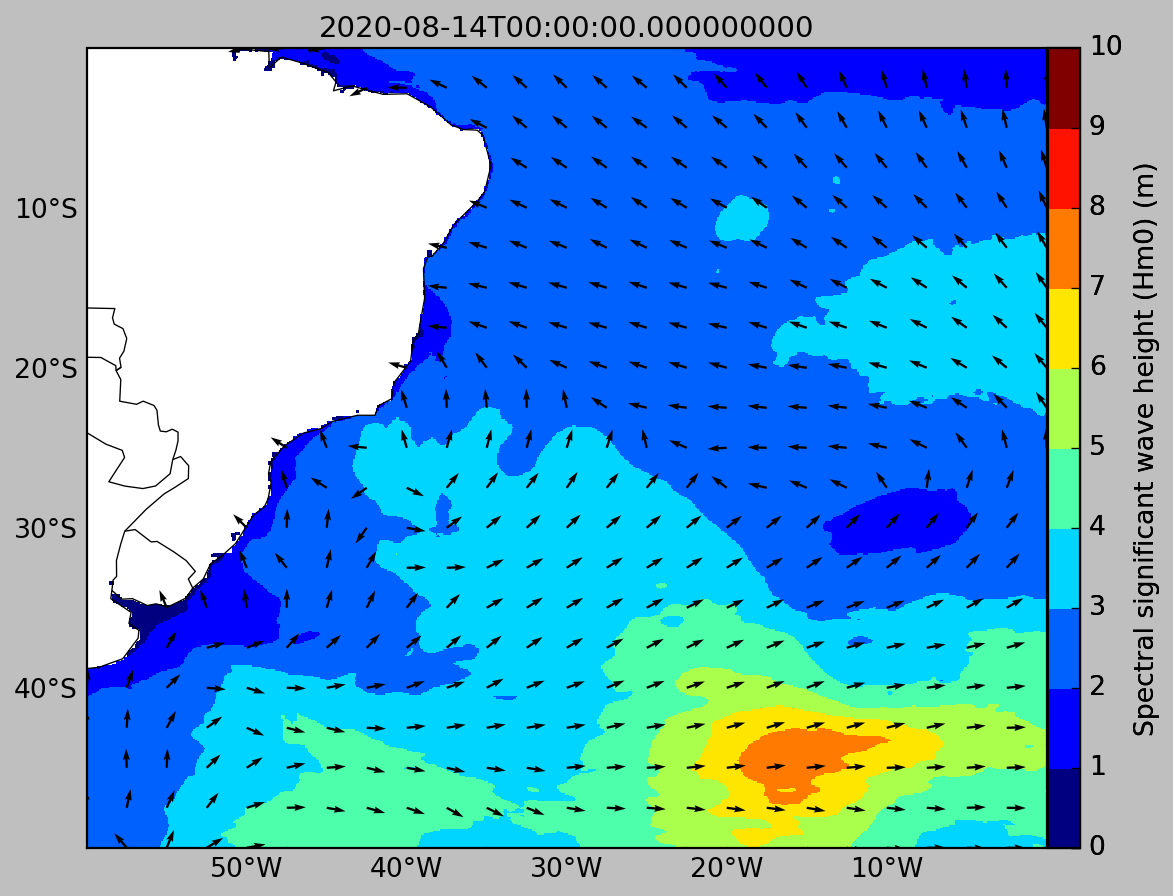

In [35]:
import proplot as plot

fig, ax = plot.subplots(axheight=5, tight=True,proj='pcarree') # crio o subplot, e o eixo x tenha 5 de tamanho, e a projeção é plate carree

# plot
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=10, lonlines=10, # definindo o grid de coordenadas
          latlim=(0, -50), lonlim=(0,-60), # definindo os limites do mapa
          title=f'{wav_ds.isel(time=0).time.values}')

skip_points = 30
res_scale = 1
min_value, max_value = 0, 10

im = ax.pcolor(wav_ds['longitude'].data[::res_scale], wav_ds['latitude'].data[::res_scale],
               wav_ds['VHM0'].isel(time=0).squeeze()[::res_scale,::res_scale],
               vmin=min_value,vmax=max_value,
               cmap='jet')


vect = ax.quiver(wav_ds['longitude'].data[::skip_points],wav_ds['latitude'].data[::skip_points],
                         -np.sin(np.pi/180*(wav_ds['VMDR'].isel(time=0).squeeze().data[::skip_points,::skip_points])),
                         -np.cos(np.pi/180*(wav_ds['VMDR'].isel(time=0).squeeze().data[::skip_points,::skip_points])),scale=50)
cbar =fig.colorbar(im,ax=ax,fraction=0.03, pad=0.04)    
plt.savefig(np.datetime_as_string(wav_ds.isel(time=0).time.values,unit='h')+'.png')

<font size='5'> A partir de agora, vou analisar os dados de uma maneira parecida com o script de dados da boia RJ-4 do SiMCosta </font>

In [ ]:
wav_ds.longitude.values

In [37]:
# a variável vhm0 é correspondente a altura significativa enquanto que a variável vmdr é correspondente à direção
# vou então realizar um recorte espacial para analisar os dados mais proximos à praia de ipanema/leblon ou copacabana pra comparar com os dados da boia

# vou atribuir a localização da boia...
ondas = wav_ds.sel(longitude=-43, latitude=-23.5)

# passando pra um dataframe pra ficar mais facil de visualizar as mudanças
ondas1 = ondas.to_dataframe()
# quero só os valores não nulos
ondas1 = ondas1[~ondas1.VHM0.isnull()]

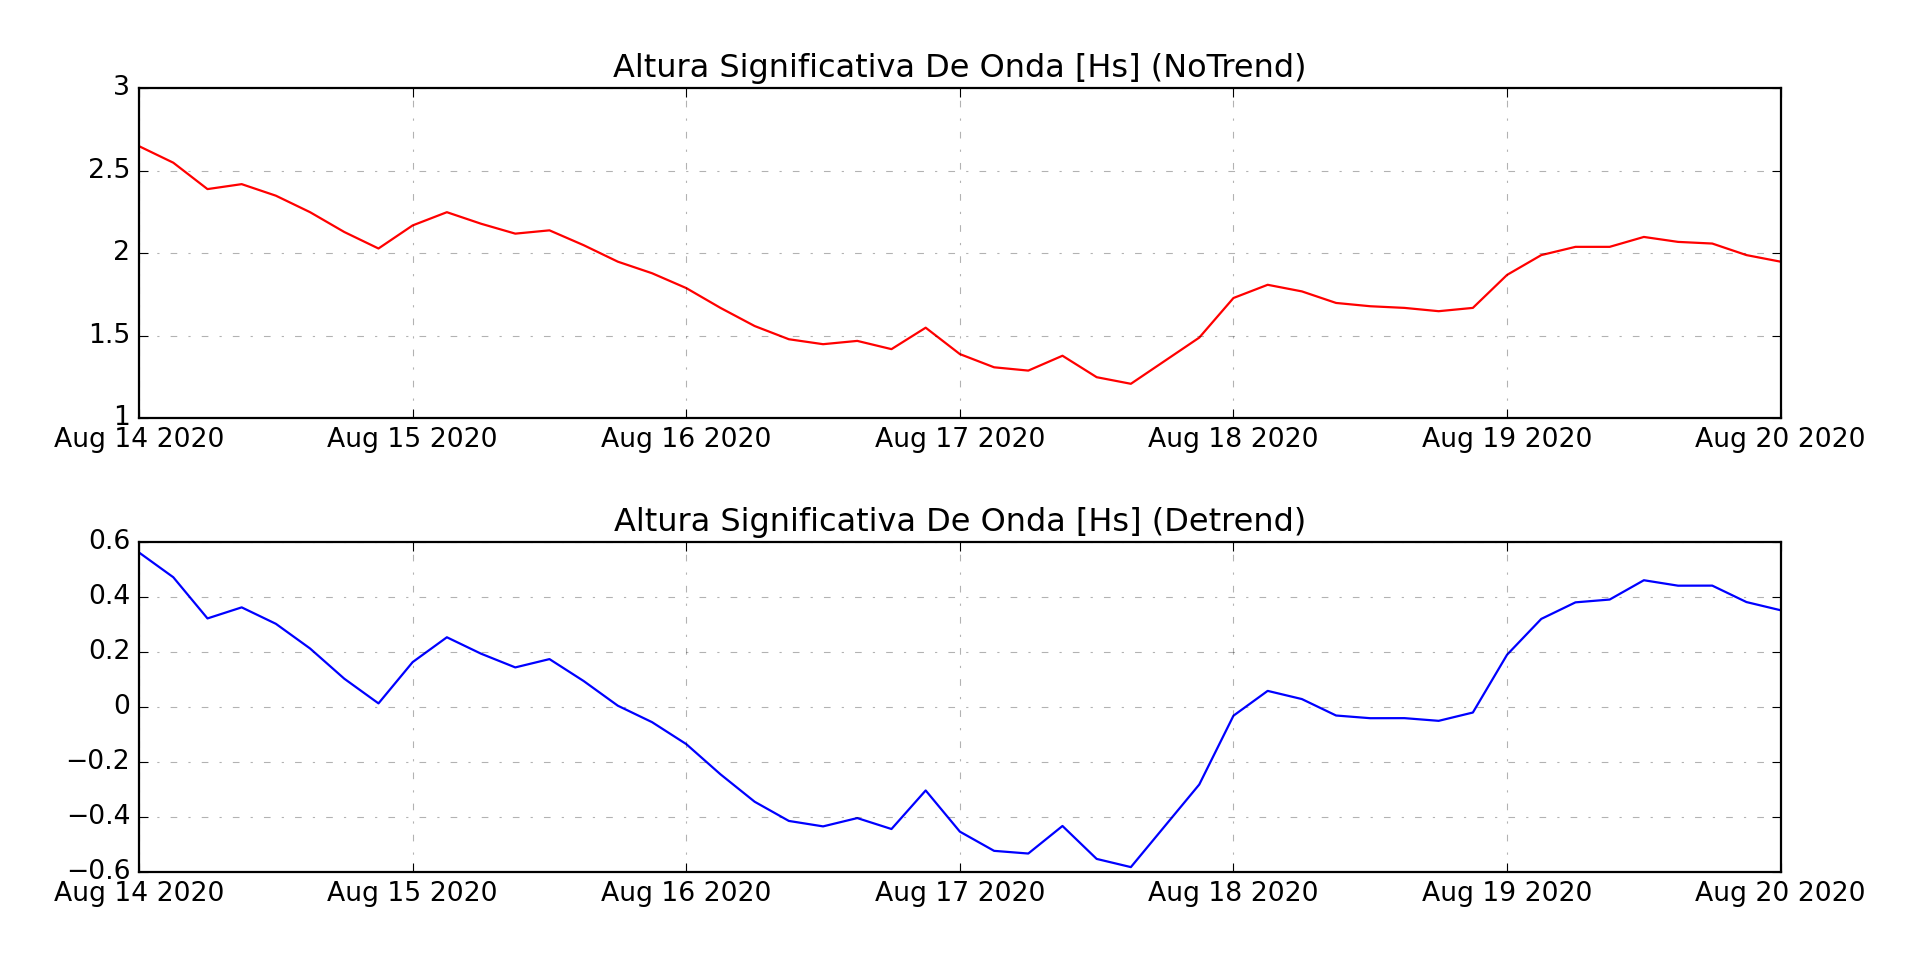

In [63]:
# plotando a série temporal
fig, ax = plt.subplots(nrows=2, figsize=(12,6), facecolor='white')
plt.style.use('classic')

ax[0].plot(ondas1.VHM0, color='red')
ax[0].grid(color='black', alpha=0.3, linestyle='dashdot')
ax[0].set_ylim(1,3)
ax[0].set_title('Altura Significativa De Onda [Hs] (NoTrend)')

 # grafico detrend
from scipy import signal
from numpy.random import default_rng

detrended = signal.detrend(ondas1.VHM0)

# fazendo o plot da série temporal com detrend
ax[1].plot(ondas1.index,detrended, color='blue')
ax[1].grid(color='black', alpha=0.3, linestyle='dashdot')
ax[1].set_ylim(-0.6,0.6)
ax[1].set_title('Altura Significativa De Onda [Hs] (Detrend)')


plt.tight_layout(pad=2)
plt.show()

A plotagem para um ponto específico funcionou. Agora preciso pegar uma série temporal maior para analisar. Vou realizar outra consulta ao banco de dados com um espaço de tempo maior.